# Real-world Data Wrangling

## 1. Gather data

### **1.1.** Problem Statement


This analysis to check the crime rate after corona virus an before in Los angeles city and what is the most sex is victim.

In [1]:
#imports
import pandas as pd
import numpy as np
import requests
%matplotlib inline

pd.set_option('display.max_columns', None)

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "Downloading files" method from "https://catalog.data.gov/dataset" this data is stopped from updating so downloading it is easier

Dataset variables:

- DR_NO: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
- Date Rptd: MM/DD/YYYY
- DATE OCC: MM/DD/YYYY
- TIME OCC: In 24 hour military time.
- AREA : The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
- AREA NAME: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
- Rpt Dist No: A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4 
- Part 1-2: 
- Crm Cd: Indicates the crime committed. (Same as Crime Code 1)
- Crm Cd Desc: Defines the Crime Code provided.
- Mocodes: Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf
- Vict Age: Two character numeric
- Vict Sex,Descent: F - Female M - Male X - Unknown Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
- Premis Cd: The type of structure, vehicle, or location where the crime took place.
- Premis Desc: Defines the Premise Code provided.
- Weapon Used Cd: The type of weapon used in the crime. 
- Weapon Desc: Defines the Weapon Used Code provided.
- Status: Status of the case. (IC is the default)
- Status Desc: Defines the Status Code provided.
- Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
- Crm Cd 2: May contain a code for an additional crime, less serious than Crime Code 1. 
- Crm Cd 3: May contain a code for an additional crime, less serious than Crime Code 1.
- Crm Cd 4: May contain a code for an additional crime, less serious than Crime Code 1.
- LOCATION: Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
- Cross Street: Cross Street of rounded Address
- (LAT,LON): Latitude,Longtitude


In [2]:
before_df = pd.read_csv('Crime_Data_from_2010_to_2019_v1.csv');
before_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,"vict sex,descent",Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,"(lat,lon)"
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,"M,H",501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,"33.9825, -118.2695"
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,"M,W",101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,"33.9599, -118.3962"
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,"M,H",103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,"34.0224, -118.2524"
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,"F,W",101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,"34.1016, -118.3295"
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,"F,H",103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,"34.0387, -118.2488"


#### Dataset 2

Type: json File

Method: The data was gathered using the "Programily fetched the file" method from "https://catalog.data.gov/dataset" this data is updated weekly so api fetching is better for it

Dataset variables:

- DR_NO: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
- Date Rptd: MM/DD/YYYY
- DATE OCC: MM/DD/YYYY
- TIME OCC: In 24 hour military time.
- AREA : The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
- AREA NAME: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
- Rpt Dist No: A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4 
- Part 1-2: 
- Crm Cd: Indicates the crime committed. (Same as Crime Code 1)
- Crm Cd Desc: Defines the Crime Code provided.
- Mocodes: Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf
- Vict Age: Two character numeric
- Vict Sex: F - Female M - Male X - Unknown
- Vict Descent: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
- Premis Cd: The type of structure, vehicle, or location where the crime took place.
- Premis Desc: Defines the Premise Code provided.
- Weapon Used Cd: The type of weapon used in the crime. 
- Weapon Desc: Defines the Weapon Used Code provided.
- Status: Status of the case. (IC is the default)
- Status Desc: Defines the Status Code provided.
- Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
- Crm Cd 2: May contain a code for an additional crime, less serious than Crime Code 1. 
- Crm Cd 3: May contain a code for an additional crime, less serious than Crime Code 1.
- Crm Cd 4: May contain a code for an additional crime, less serious than Crime Code 1.
- LOCATION: Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
- Cross Street: Cross Street of rounded Address
- LAT: Latitude
- LON: Longtitude

In [3]:
after_df = pd.read_csv("https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD")
after_df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
857653,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
857654,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
857655,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
857656,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487
857657,230319786,11/10/2023 12:00:00 AM,11/09/2023 12:00:00 AM,2300,3,Southwest,395,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 1606 0344 0385 1300,38,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,4100 S HOBART BL,NaN,34.0091,-118.3078


## 2. Assess data

### Quality Issue 1:

In [4]:
#FILL IN - Inspecting the dataframe visually
before_df.sample(5,random_state=3)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,"vict sex,descent",Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,"(lat,lon)"
929238,151711365,06/09/2015 12:00:00 AM,06/03/2015 12:00:00 AM,2330,17,Devonshire,1772,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344,56,"F,O",108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,9700 KESSLER AV,NaN,"34.2461, -118.5678"
279686,110300866,03/27/2011 12:00:00 AM,03/27/2011 12:00:00 AM,1945,3,Southwest,363,1,310,BURGLARY,0325 0344 1402,49,"M,H",203.0,OTHER BUSINESS,NaN,NaN,AA,Adult Arrest,310.0,998.0,NaN,NaN,4100 CRENSHAW BL,NaN,"34.0102, -118.3351"
907134,150312779,05/21/2015 12:00:00 AM,05/20/2015 12:00:00 AM,500,3,Southwest,308,2,624,BATTERY - SIMPLE ASSAULT,0429 1822 1206 0305 0416,42,"M,H",101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,TOBERMAN,21ST,"34.0357, -118.2806"
1265043,161310924,04/29/2016 12:00:00 AM,04/28/2016 12:00:00 AM,2000,13,Newton,1383,2,237,CHILD NEGLECT (SEE 300 W.I.C.),0552 1259 1251,14,"M,H",501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,237.0,NaN,NaN,NaN,200 W 62ND ST,NaN,"33.9833, -118.2761"
1877257,191314295,07/01/2019 12:00:00 AM,07/01/2019 12:00:00 AM,620,13,Newton,1385,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,55,"F,H",203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,900 E SLAUSON AV,NaN,"33.9893, -118.2593"


In [5]:
#FILL IN - Inspecting the dataframe programmatically
# to find inconsestent 
df_sort = before_df.sort_values(by='Vict Age', ascending=True)
df_sort.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,"vict sex,descent",Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,"(lat,lon)"
184432,220715841,10/27/2022 12:00:00 AM,01/01/2010 12:00:00 AM,905,7,Wilshire,749,2,354,THEFT OF IDENTITY,0100 1822,-12,"X,X",501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,900 CRENSHAW BL,NaN,"34.0585, -118.3262"
184453,221607869,05/02/2022 12:00:00 AM,01/01/2010 12:00:00 AM,1,16,Foothill,1612,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344,-12,"M,W",109.0,PARK/PLAYGROUND,NaN,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,11200 GLENOAKS BL,NaN,"34.2733, -118.4202"
131684,210809480,05/20/2021 12:00:00 AM,01/01/2010 12:00:00 AM,900,8,West LA,831,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1501,-11,"M,W",203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,956.0,NaN,NaN,NaN,12100 WILSHIRE BL,NaN,"34.0473, -118.4768"
208521,221712600,08/22/2022 12:00:00 AM,08/21/2011 12:00:00 AM,500,17,Devonshire,1791,1,310,BURGLARY,1609 0202 0325 0329 0216 1203,-10,"X,X",406.0,OTHER STORE,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,20500 ROSCOE BL,NaN,"34.2244, -118.5804"
188748,221420283,12/10/2022 12:00:00 AM,12/10/2011 12:00:00 AM,1130,14,Pacific,1431,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,-10,"X,X",710.0,OTHER PREMISE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,MARKET,OCEAN FRONT WK,"33.9874, -118.4741"


Issue and justification: there are null values in crm cd 2 ,3 4 and in weapon used cd
for the crm cd it could be the criminal didn't do more crimes and jsut one but the weapon used cd it could be that the officer didn't fill it and the age is starting at -12 there is error here

### Quality Issue 2:

In [6]:
#FILL IN - Inspecting the dataframe visually
after_df.sample(5,random_state=3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
800035,231915324,10/14/2023 12:00:00 AM,10/13/2023 12:00:00 AM,1630,19,Mission,1985,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,48,F,H,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14600 PARTHENIA ST,NaN,34.2271,-118.4503
355318,211907048,03/28/2021 12:00:00 AM,03/27/2021 12:00:00 AM,1900,19,Mission,1994,1,330,BURGLARY FROM VEHICLE,0321 0344 1609,26,F,O,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,14800 ROSCOE BL,NaN,34.2215,-118.4559
55894,200807793,03/28/2020 12:00:00 AM,03/28/2020 12:00:00 AM,925,8,West LA,818,1,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 0444 0344 2004,53,F,W,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,10800 LE CONTE AV,NaN,34.0711,-118.4454
418043,220121106,09/22/2022 12:00:00 AM,09/22/2022 12:00:00 AM,1254,1,Central,185,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0913 1814 0443 1414 2000 1912,21,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other,930.0,NaN,NaN,NaN,1200 S BROADWAY,NaN,34.0382,-118.2603
621716,221005253,02/03/2022 12:00:00 AM,02/03/2022 12:00:00 AM,720,10,West Valley,1039,1,310,BURGLARY,1822 1607 0344 0352 1420 1414,38,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,15900 VANOWEN ST,NaN,34.1939,-118.4793


In [7]:
#FILL IN - Inspecting the dataframe programmatically
df_sorted = after_df.sort_values(by='Vict Age', ascending=True)
df_sorted.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
199161,230811826,07/12/2023 12:00:00 AM,01/01/2020 12:00:00 AM,5,8,West LA,839,2,670,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",1803,-3,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,670.0,NaN,NaN,NaN,CENTURY PARK,CENTURY PARK,34.0630,-118.4159
199057,231412171,06/09/2023 12:00:00 AM,06/01/2020 12:00:00 AM,1200,14,Pacific,1435,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,-2,M,W,501.0,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,930.0,NaN,NaN,NaN,3500 GRAND VIEW BL,NaN,34.0118,-118.4365
199106,231711731,05/25/2023 12:00:00 AM,06/02/2020 12:00:00 AM,1,17,Devonshire,1737,2,354,THEFT OF IDENTITY,1202 0923 1822,-2,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,16800 SAN FERNANDO MISSION BL,NaN,34.2720,-118.4978
199388,230815276,10/05/2023 12:00:00 AM,10/05/2020 12:00:00 AM,1000,8,West LA,807,1,510,VEHICLE - STOLEN,2004 0344,-2,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,MOORPARK,VAN NUYS,34.1126,-118.4441
198851,231707697,04/04/2023 12:00:00 AM,05/20/2020 12:00:00 AM,1600,17,Devonshire,1782,2,354,THEFT OF IDENTITY,0935 1822 1501,-2,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,19500 BUSINESS CENTER DR,NaN,34.2313,-118.5564


In [8]:
after_df.duplicated().sum()

0

Issue and justification: there are many rows have na in it, it might be the officer didn't register it because of the situation or somethin else and the age start form -3 and this isn't possiable

### Tidiness Issue 1:

In [9]:
#FILL IN - Inspecting the dataframe visually
before_df.sample(6,random_state=13)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,"vict sex,descent",Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,"(lat,lon)"
764271,140906948,02/28/2014 12:00:00 AM,02/28/2014 12:00:00 AM,1900,9,Van Nuys,969,1,330,BURGLARY FROM VEHICLE,1307 0344,36,"M,H",108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,5300 COLDWATER CANYON AV,NaN,"34.1666, -118.4138"
293032,111718719,10/16/2011 12:00:00 AM,10/16/2011 12:00:00 AM,1340,17,Devonshire,1749,1,210,ROBBERY,0334 0337 1402,0,"M,W",210.0,RESTAURANT/FAST FOOD,201.0,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH,JA,Juv Arrest,210.0,998.0,NaN,NaN,16200 DEVONSHIRE ST,NaN,"34.2574, -118.4849"
1656643,180308157,03/03/2018 12:00:00 AM,02/24/2018 12:00:00 AM,540,3,Southwest,328,1,480,BIKE - STOLEN,1251 0344,19,"F,W",123.0,PARKING UNDERGROUND/BUILDING,NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,3200 ROYAL ST,NaN,"34.0246, -118.2813"
1588835,180717030,09/22/2018 12:00:00 AM,09/22/2018 12:00:00 AM,30,7,Wilshire,737,1,330,BURGLARY FROM VEHICLE,0344,27,"F,B",101.0,STREET,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,LA BREA,6TH,"34.0649, -118.344"
1183437,161614145,09/18/2016 12:00:00 AM,09/18/2016 12:00:00 AM,1630,16,Foothill,1645,2,903,CONTEMPT OF COURT,2000 1814,31,"F,B",501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other,903.0,NaN,NaN,NaN,12500 BERNADETTE ST,NaN,"34.2641, -118.4052"
1037168,152101075,12/24/2015 12:00:00 AM,12/24/2015 12:00:00 AM,1330,21,Topanga,2129,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0416 0913,16,"M,H",502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",301.0,BELT FLAILING INSTRUMENT/CHAIN,AA,Adult Arrest,627.0,NaN,NaN,NaN,19900 ROSCOE BL,NaN,"34.2203, -118.5667"


In [10]:
#FILL IN - Inspecting the dataframe programmatically
before_df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4
count,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903789e+06,711777.000000,1.903783e+06,141188.000000,3639.000000,106.000000
mean,1.494595e+08,1.348616e+03,1.110073e+01,1.156457e+03,1.484982e+00,5.051757e+02,3.504074e+01,3.298877e+02,370.998221,5.049724e+02,949.331303,972.511679,976.849057
std,3.025075e+07,6.449341e+02,6.050419e+00,6.049384e+02,4.997745e-01,2.188378e+02,1.883864e+01,2.103400e+02,113.522417,2.186830e+02,125.245697,84.424966,79.788386
min,1.208575e+06,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-1.200000e+01,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000
25%,1.215154e+08,9.300000e+02,6.000000e+00,6.440000e+02,1.000000e+00,3.300000e+02,2.300000e+01,1.040000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.511161e+08,1.415000e+03,1.100000e+01,1.184000e+03,1.000000e+00,4.400000e+02,3.400000e+01,4.020000e+02,400.000000,4.400000e+02,998.000000,998.000000,998.000000
75%,1.719134e+08,1.900000e+03,1.600000e+01,1.684000e+03,2.000000e+00,6.490000e+02,4.800000e+01,5.010000e+02,400.000000,6.490000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.000000


Issue and justification: the column of vict sex,descent is not Each Variable Forms a Column

### Tidiness Issue 2: 

In [11]:
#FILL IN - Inspecting the dataframe visually
before_df.sample(6,random_state=22)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,"vict sex,descent",Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,"(lat,lon)"
183036,101925493,11/23/2010 12:00:00 AM,11/01/2010 12:00:00 AM,800,19,Mission,1974,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1202,67,"F,W",501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,956.0,NaN,NaN,NaN,8900 WILLIS AV,NaN,"34.2318, -118.4553"
1598614,180810921,05/25/2018 12:00:00 AM,05/23/2018 12:00:00 AM,1905,8,West LA,805,1,330,BURGLARY FROM VEHICLE,0344 0342 1309 1420 0202,52,"F,W",101.0,STREET,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,15500 HAMNER DR,NaN,"34.1243, -118.4646"
1197281,161910529,04/24/2016 12:00:00 AM,04/24/2016 12:00:00 AM,1200,19,Mission,1981,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0906 1259 0445 1805 0432 0371 0913 1313 0334 0342,14,"M,H",108.0,PARKING LOT,207.0,OTHER KNIFE,JA,Juv Arrest,230.0,NaN,NaN,NaN,SEPULVEDA BL,PARTHENIA ST,"34.2283, -118.4677"
1503165,180718168,10/15/2018 12:00:00 AM,10/14/2018 12:00:00 AM,1945,7,Wilshire,778,1,330,BURGLARY FROM VEHICLE,1606 0344,54,"M,H",101.0,STREET,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 7TH AV,NaN,"34.0418, -118.3249"
1115001,161422460,08/28/2016 12:00:00 AM,08/27/2016 12:00:00 AM,1800,14,Pacific,1415,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 0394,32,"F,W",502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,1600 PENMAR AV,NaN,"34.0034, -118.4577"
1543747,180808022,03/28/2018 12:00:00 AM,03/27/2018 12:00:00 AM,2000,8,West LA,893,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1300,45,"M,H",104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,2600 MILITARY AV,NaN,"34.0343, -118.4299"


In [12]:
#FILL IN - Inspecting the dataframe programmatically
before_df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4
count,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903792e+06,1.903789e+06,711777.000000,1.903783e+06,141188.000000,3639.000000,106.000000
mean,1.494595e+08,1.348616e+03,1.110073e+01,1.156457e+03,1.484982e+00,5.051757e+02,3.504074e+01,3.298877e+02,370.998221,5.049724e+02,949.331303,972.511679,976.849057
std,3.025075e+07,6.449341e+02,6.050419e+00,6.049384e+02,4.997745e-01,2.188378e+02,1.883864e+01,2.103400e+02,113.522417,2.186830e+02,125.245697,84.424966,79.788386
min,1.208575e+06,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-1.200000e+01,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000
25%,1.215154e+08,9.300000e+02,6.000000e+00,6.440000e+02,1.000000e+00,3.300000e+02,2.300000e+01,1.040000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.511161e+08,1.415000e+03,1.100000e+01,1.184000e+03,1.000000e+00,4.400000e+02,3.400000e+01,4.020000e+02,400.000000,4.400000e+02,998.000000,998.000000,998.000000
75%,1.719134e+08,1.900000e+03,1.600000e+01,1.684000e+03,2.000000e+00,6.490000e+02,4.800000e+01,5.010000e+02,400.000000,6.490000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.000000


Issue and justification: the column of (lat,lon) is not Each Variable Forms a Column

## 3. Clean data


In [13]:
before_cleaned = before_df.copy()
after_cleaned = after_df.copy()

### **Quality Issue 1:**

In [14]:
before_cleaned.isna().sum()

DR_NO                     0
Date Rptd                 0
DATE OCC                  0
TIME OCC                  0
AREA                      0
AREA NAME                 0
Rpt Dist No               0
Part 1-2                  0
Crm Cd                    0
Crm Cd Desc               0
Mocodes                   0
Vict Age                  0
vict sex,descent        451
Premis Cd                 3
Premis Desc             143
Weapon Used Cd      1192015
Weapon Desc         1192016
Status                    2
Status Desc               0
Crm Cd 1                  9
Crm Cd 2            1762604
Crm Cd 3            1900153
Crm Cd 4            1903686
LOCATION                  0
Cross Street        1594599
(lat,lon)                 0
dtype: int64

In [15]:
# FILL IN - Apply the cleaning strategy

# the rows that has na values will be dropped except the Crm Cd 2,3,4 because it is optional fields 
# so letting the other rows will change the accuracy
before_cleaned.dropna(subset=['vict sex,descent',"Crm Cd 1","Premis Desc"], inplace=True)


In [16]:
#this code to replace the wrong age numbers with nan then giv it the mean of the ages
before_cleaned.replace([0,-3,-2,-1,-4,-5,-6,-7,-8,-9,-10,-11,-12], np.nan,inplace=True)
print('')

In [17]:
df_sort = before_cleaned.sort_values(by='Vict Age', ascending=True)
df_sort.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,"vict sex,descent",Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,"(lat,lon)"
71856,121608798,04/19/2012 12:00:00 AM,01/01/2010 12:00:00 AM,800,16,Foothill,1654,2,237,CHILD NEGLECT (SEE 300 W.I.C.),1257 0552,2.0,"F,H",502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,237.0,NaN,NaN,NaN,12300 OSBORNE PL,NaN,"34.2602, -118.4013"
1631907,180105444,01/22/2018 12:00:00 AM,01/21/2018 12:00:00 AM,2130,1,Central,182,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1307,2.0,"X,X",203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,400 W 9TH ST,NaN,"34.0437, -118.2582"
1072436,230512131,08/09/2023 12:00:00 AM,01/01/2015 12:00:00 AM,1800,5,Harbor,501,2,860,BATTERY WITH SEXUAL CONTACT,0913 0537 0505 0360 0522,2.0,"F,W",501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,860.0,NaN,NaN,NaN,1100 W 186TH ST,NaN,"33.862, -118.2928"
882494,140500830,05/13/2014 12:00:00 AM,05/13/2014 12:00:00 AM,1320,5,Harbor,557,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0329 0447 1257,2.0,"M,H",108.0,PARKING LOT,306.0,ROCK/THROWN OBJECT,AA,Adult Arrest,230.0,NaN,NaN,NaN,GAFFEY ST,6TH ST,"33.7388, -118.2923"
195143,111910972,04/25/2011 12:00:00 AM,02/06/2011 12:00:00 AM,1900,19,Mission,1924,2,237,CHILD NEGLECT (SEE 300 W.I.C.),1257 1501,2.0,"F,H",501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,237.0,NaN,NaN,NaN,14800 HUBBARD ST,NaN,"34.2871, -118.4539"


In [18]:
# FILL IN - Validate the cleaning was successful
print(before_cleaned.info())
before_cleaned.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1903192 entries, 0 to 1903791
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DR_NO             int64  
 1   Date Rptd         object 
 2   DATE OCC          object 
 3   TIME OCC          int64  
 4   AREA              int64  
 5   AREA NAME         object 
 6   Rpt Dist No       int64  
 7   Part 1-2          int64  
 8   Crm Cd            int64  
 9   Crm Cd Desc       object 
 10  Mocodes           object 
 11  Vict Age          float64
 12  vict sex,descent  object 
 13  Premis Cd         float64
 14  Premis Desc       object 
 15  Weapon Used Cd    float64
 16  Weapon Desc       object 
 17  Status            object 
 18  Status Desc       object 
 19  Crm Cd 1          float64
 20  Crm Cd 2          float64
 21  Crm Cd 3          float64
 22  Crm Cd 4          float64
 23  LOCATION          object 
 24  Cross Street      object 
 25  (lat,lon)         object 
dtypes: float64(7), int6

DR_NO                     0
Date Rptd                 0
DATE OCC                  0
TIME OCC                  0
AREA                      0
AREA NAME                 0
Rpt Dist No               0
Part 1-2                  0
Crm Cd                    0
Crm Cd Desc               0
Mocodes                   0
Vict Age             170149
vict sex,descent          0
Premis Cd                 0
Premis Desc               0
Weapon Used Cd      1191671
Weapon Desc         1191672
Status                    2
Status Desc               0
Crm Cd 1                  0
Crm Cd 2            1762129
Crm Cd 3            1899560
Crm Cd 4            1903086
LOCATION                  0
Cross Street        1594084
(lat,lon)                 0
dtype: int64

Justification: will leave the na rows in the rest because the coulumn will be dropped it will make the dataset laking and the analysis doesn't include weapons it is about crime rate

### **Quality Issue 2:**

In [19]:
after_cleaned.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           119020
Vict Age               0
Vict Sex          113250
Vict Descent      113258
Premis Cd             10
Premis Desc          523
Weapon Used Cd    559467
Weapon Desc       559467
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          794826
Crm Cd 3          855540
Crm Cd 4          857596
LOCATION               0
Cross Street      721335
LAT                    0
LON                    0
dtype: int64

In [20]:
# FILL IN - Apply the cleaning strategy

# the rows that has na values will be dropped except the Crm Cd 2,3,4 because it is optional fields 
# so letting the other rows will change the accuracy
after_cleaned.dropna(subset=['Mocodes','Vict Sex',"Vict Descent","Crm Cd 1","Premis Desc"], inplace=True)


In [21]:
#this code to replace the wrong age numbers with nan then giv it the mean of the ages
after_cleaned.replace([0,-3,-2,-1], np.nan, inplace=True)
print("")

In [22]:
after_cleaned['Vict Age'].fillna(after_cleaned['Vict Age'].mean(),inplace=True)

In [23]:
df_sorted = after_cleaned.sort_values(by='Vict Age', ascending=True)
df_sorted.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
568289,221113192,08/27/2022 12:00:00 AM,08/27/2022 12:00:00 AM,440,11,Northeast,1138,2,237,CHILD NEGLECT (SEE 300 W.I.C.),1300 0319 2004 1257 0553 2021 1310,2.0,M,H,101.0,STREET,NaN,NaN,AO,Adult Other,237.0,NaN,NaN,NaN,AVENUE 60,FIGUEROA ST,34.1111,-118.1898
264528,212106845,03/21/2021 12:00:00 AM,03/21/2021 12:00:00 AM,1250,21,Topanga,2187,2,624,BATTERY - SIMPLE ASSAULT,0447,2.0,M,X,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,21100 VENTURA BL,NaN,34.1670,-118.5928
747834,231006509,03/06/2023 12:00:00 AM,03/06/2023 12:00:00 AM,1200,10,West Valley,1023,2,237,CHILD NEGLECT (SEE 300 W.I.C.),1257 0913 0553,2.0,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,237.0,NaN,NaN,NaN,6700 SYLVIA AV,NaN,34.1922,-118.5524
522851,221810005,04/30/2022 12:00:00 AM,04/30/2022 12:00:00 AM,1600,18,Southeast,1832,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 1310 0919 0216 1257 0432 0450 1240,2.0,M,B,101.0,STREET,106.0,UNKNOWN FIREARM,IC,Invest Cont,230.0,NaN,NaN,NaN,107TH ST,SAN PEDRO,33.9393,-118.2695
89246,201108939,05/02/2020 12:00:00 AM,05/01/2020 12:00:00 AM,1950,11,Northeast,1118,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0906 1822 0312 0302 1805 1809 1270 1300,2.0,M,H,101.0,STREET,102.0,HAND GUN,AO,Adult Other,230.0,NaN,NaN,NaN,N AVENUE 56,ASH ST,34.1140,-118.1949


In [24]:
#FILL IN - Validate the cleaning was successful

print(after_cleaned.info())
after_cleaned.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 737684 entries, 0 to 857657
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           737684 non-null  int64  
 1   Date Rptd       737684 non-null  object 
 2   DATE OCC        737684 non-null  object 
 3   TIME OCC        737684 non-null  int64  
 4   AREA            737684 non-null  int64  
 5   AREA NAME       737684 non-null  object 
 6   Rpt Dist No     737684 non-null  int64  
 7   Part 1-2        737684 non-null  int64  
 8   Crm Cd          737684 non-null  int64  
 9   Crm Cd Desc     737684 non-null  object 
 10  Mocodes         737684 non-null  object 
 11  Vict Age        737684 non-null  float64
 12  Vict Sex        737684 non-null  object 
 13  Vict Descent    737684 non-null  object 
 14  Premis Cd       737684 non-null  float64
 15  Premis Desc     737684 non-null  object 
 16  Weapon Used Cd  297248 non-null  float64
 17  Weapon Desc    

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age               0
Vict Sex               0
Vict Descent           0
Premis Cd              0
Premis Desc            0
Weapon Used Cd    440436
Weapon Desc       440436
Status                 0
Status Desc            0
Crm Cd 1               0
Crm Cd 2          675249
Crm Cd 3          735569
Crm Cd 4          737622
LOCATION               0
Cross Street      623184
LAT                 2127
LON                 2127
dtype: int64

Justification: will leave the na rows in the rest because the coulumn will be dropped it will make the dataset laking and the analysis doesn't include weapons it is about crime rate

### **Tidiness Issue 1:**  

In [25]:
#FILL IN - Apply the cleaning strategy
before_cleaned[['Vict Sex','Vict Descent']] = before_cleaned['vict sex,descent'].str.split(',', expand=True)

order = ["DR_NO","Date Rptd","DATE OCC","TIME OCC","AREA ","AREA NAME","Rpt Dist No",
         "Part 1-2","Crm Cd","Crm Cd Desc","Mocodes","Vict Age","Vict Sex","Vict Descent","vict sex,descent",
         "Premis Cd","Premis Desc","Weapon Used Cd","Weapon Desc","Status","Status Desc","Crm Cd 1","Crm Cd 2",
         "Crm Cd 3","Crm Cd 4","LOCATION","Cross Street","(lat,lon)"]

before_cleaned = before_cleaned[order]

In [26]:
#FILL IN - Validate the cleaning was successful
before_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1903192 entries, 0 to 1903791
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DR_NO             int64  
 1   Date Rptd         object 
 2   DATE OCC          object 
 3   TIME OCC          int64  
 4   AREA              int64  
 5   AREA NAME         object 
 6   Rpt Dist No       int64  
 7   Part 1-2          int64  
 8   Crm Cd            int64  
 9   Crm Cd Desc       object 
 10  Mocodes           object 
 11  Vict Age          float64
 12  Vict Sex          object 
 13  Vict Descent      object 
 14  vict sex,descent  object 
 15  Premis Cd         float64
 16  Premis Desc       object 
 17  Weapon Used Cd    float64
 18  Weapon Desc       object 
 19  Status            object 
 20  Status Desc       object 
 21  Crm Cd 1          float64
 22  Crm Cd 2          float64
 23  Crm Cd 3          float64
 24  Crm Cd 4          float64
 25  LOCATION          object 
 26  Cross Street      o

Justification: making every column give one info will make the analysis more clearer and easier to read

### **Tidiness Issue 2:**

In [27]:
#FILL IN - Apply the cleaning strategy
before_cleaned[['LAT','LON']] = before_cleaned["(lat,lon)"].str.split(',', expand=True)

In [28]:
#FILL IN - Validate the cleaning was successful
before_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1903192 entries, 0 to 1903791
Data columns (total 30 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DR_NO             int64  
 1   Date Rptd         object 
 2   DATE OCC          object 
 3   TIME OCC          int64  
 4   AREA              int64  
 5   AREA NAME         object 
 6   Rpt Dist No       int64  
 7   Part 1-2          int64  
 8   Crm Cd            int64  
 9   Crm Cd Desc       object 
 10  Mocodes           object 
 11  Vict Age          float64
 12  Vict Sex          object 
 13  Vict Descent      object 
 14  vict sex,descent  object 
 15  Premis Cd         float64
 16  Premis Desc       object 
 17  Weapon Used Cd    float64
 18  Weapon Desc       object 
 19  Status            object 
 20  Status Desc       object 
 21  Crm Cd 1          float64
 22  Crm Cd 2          float64
 23  Crm Cd 3          float64
 24  Crm Cd 4          float64
 25  LOCATION          object 
 26  Cross Street      o

Justification: making every column give one info will make the analysis more clearer and easier to read and will give more versatile angles to explore if you want to 

### **Remove unnecessary variables and combine datasets**



In [29]:
#FILL IN - Remove unnecessary variables and combine datasets

#those column either to much null that it would break the data if deleted or will not be investageted

col_to_drop = ["DR_NO","Date Rptd","TIME OCC","Rpt Dist No","Part 1-2","Weapon Used Cd","Weapon Desc",
               "Crm Cd 2","Crm Cd 3","Crm Cd 4","Cross Street","Mocodes"]

before_cleaned.drop(col_to_drop+['AREA ','(lat,lon)','vict sex,descent'], axis=1, inplace=True)
after_cleaned.drop(col_to_drop+['AREA'], axis=1, inplace=True)




In [30]:
before_cleaned.head()

,DATE OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,02/20/2010 12:00:00 AM,Newton,900,VIOLATION OF COURT ORDER,48.0,M,H,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695
1,09/12/2010 12:00:00 AM,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,M,W,101.0,STREET,IC,Invest Cont,740.0,SEPULVEDA BL,33.9599,-118.3962
2,08/09/2010 12:00:00 AM,Newton,946,OTHER MISCELLANEOUS CRIME,NaN,M,H,103.0,ALLEY,IC,Invest Cont,946.0,1300 E 21ST ST,34.0224,-118.2524
3,01/05/2010 12:00:00 AM,Hollywood,900,VIOLATION OF COURT ORDER,47.0,F,W,101.0,STREET,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295
4,01/02/2010 12:00:00 AM,Central,122,"RAPE, ATTEMPTED",47.0,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488


In [31]:
after_cleaned.head()

,DATE OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,Southwest,624,BATTERY - SIMPLE ASSAULT,36.00000,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,Central,624,BATTERY - SIMPLE ASSAULT,25.00000,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,39.56995,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.00000,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.00000,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [32]:
print(before_cleaned.info())
print(after_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1903192 entries, 0 to 1903791
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DATE OCC      object 
 1   AREA NAME     object 
 2   Crm Cd        int64  
 3   Crm Cd Desc   object 
 4   Vict Age      float64
 5   Vict Sex      object 
 6   Vict Descent  object 
 7   Premis Cd     float64
 8   Premis Desc   object 
 9   Status        object 
 10  Status Desc   object 
 11  Crm Cd 1      float64
 12  LOCATION      object 
 13  LAT           object 
 14  LON           object 
dtypes: float64(3), int64(1), object(11)
memory usage: 232.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 737684 entries, 0 to 857657
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE OCC      737684 non-null  object 
 1   AREA NAME     737684 non-null  object 
 2   Crm Cd        737684 non-null  int64  
 3   Crm Cd Desc   737684 non-null  o

In [33]:
#here we change data types to optimize memory and to create year table

def change_type(column, dtype):
    before_cleaned[column] = before_cleaned[column].astype(dtype)
    after_cleaned[column] = after_cleaned[column].astype(dtype)

before_cleaned['DATE OCC']= pd.to_datetime(before_cleaned['DATE OCC'])
after_cleaned['DATE OCC']= pd.to_datetime(after_cleaned['DATE OCC'])

change_type("Crm Cd","int16")
change_type("Vict Age","float32")
change_type("Premis Cd","float32")
change_type("Crm Cd 1","float32")


print(before_cleaned.info())
print(after_cleaned.info())

C:\Users\asem\AppData\Local\Temp\ipykernel_27804\2848267449.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  before_cleaned['DATE OCC']= pd.to_datetime(before_cleaned['DATE OCC'])
C:\Users\asem\AppData\Local\Temp\ipykernel_27804\2848267449.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  after_cleaned['DATE OCC']= pd.to_datetime(after_cleaned['DATE OCC'])


<class 'pandas.core.frame.DataFrame'>
Index: 1903192 entries, 0 to 1903791
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   DATE OCC      datetime64[ns]
 1   AREA NAME     object        
 2   Crm Cd        int16         
 3   Crm Cd Desc   object        
 4   Vict Age      float32       
 5   Vict Sex      object        
 6   Vict Descent  object        
 7   Premis Cd     float32       
 8   Premis Desc   object        
 9   Status        object        
 10  Status Desc   object        
 11  Crm Cd 1      float32       
 12  LOCATION      object        
 13  LAT           object        
 14  LON           object        
dtypes: datetime64[ns](1), float32(3), int16(1), object(10)
memory usage: 199.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 737684 entries, 0 to 857657
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DATE OCC    

In [34]:
#create year column 
before_cleaned['year'] = before_cleaned['DATE OCC'].dt.year
after_cleaned['year'] = after_cleaned['DATE OCC'].dt.year

before_cleaned.head()

,DATE OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year
0,2010-02-20,Newton,900,VIOLATION OF COURT ORDER,48.0,M,H,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695,2010
1,2010-09-12,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,M,W,101.0,STREET,IC,Invest Cont,740.0,SEPULVEDA BL,33.9599,-118.3962,2010
2,2010-08-09,Newton,946,OTHER MISCELLANEOUS CRIME,NaN,M,H,103.0,ALLEY,IC,Invest Cont,946.0,1300 E 21ST ST,34.0224,-118.2524,2010
3,2010-01-05,Hollywood,900,VIOLATION OF COURT ORDER,47.0,F,W,101.0,STREET,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295,2010
4,2010-01-02,Central,122,"RAPE, ATTEMPTED",47.0,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488,2010


In [35]:
after_cleaned.head()

,DATE OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year
0,2020-01-08,Southwest,624,BATTERY - SIMPLE ASSAULT,36.00000,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020
1,2020-01-01,Central,624,BATTERY - SIMPLE ASSAULT,25.00000,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020
2,2020-02-13,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,39.56995,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020
3,2020-01-01,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.00000,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020
4,2020-01-01,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.00000,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020


In [36]:
before_three_years = before_cleaned[before_cleaned['year'] >= 2017]

In [37]:
#this is unexpected issue there is 2021 it not suppose to be here but will fix it after the merge
before_three_years['year'].unique()

print((before_three_years['year'] == 2021).value_counts())

year
False    609205
True      33757
Name: count, dtype: int64


In [38]:
after_three_years = after_cleaned[after_cleaned['year'] >= 2021]

In [39]:
after_three_years['year'].unique()

array([2021, 2022, 2023])

In [40]:
#here the two dataframes will be merged together
#sorted by the year because it is easier to plot in the next section

full_df = pd.concat([before_three_years,after_three_years],ignore_index=True).sort_values(by='year', ascending=True)

In [41]:
#in the next three cells will fix the 2021 problem
full_df.duplicated().value_counts()

False    1200669
True        7337
Name: count, dtype: int64

In [42]:
full_df.drop_duplicates(inplace=True)

In [43]:
full_df.duplicated().value_counts()

False    1200669
Name: count, dtype: int64

In [44]:
full_df['year'].unique()

array([2017, 2018, 2019, 2021, 2022, 2023])

In [45]:
# here there are more sex than the dataframe should be so will change the H, N, - to X
full_df["Vict Sex"].unique()

array(['M', 'F', 'X', 'H', 'N', '-'], dtype=object)

In [46]:
n = ["H","N","-"]

full_df["Vict Sex"].replace(n,"X",inplace=True)

In [47]:
#here we finished the cleaning
full_df["Vict Sex"].unique()

array(['M', 'F', 'X'], dtype=object)

## 4. Update your data store


In [48]:
#FILL IN - saving data
clean_data = full_df.copy()

clean_data.to_csv("clean_data.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 


*Research question:* is the crime rate more after or before covid 19

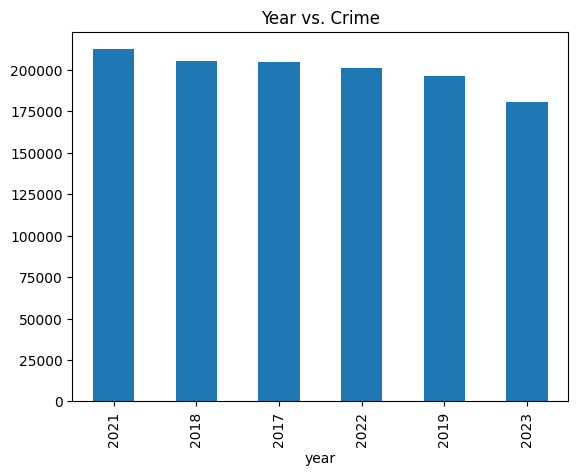

In [49]:
#Visual 1 - FILL IN
years = clean_data.year.value_counts();
years.plot(kind='bar', title='Year vs. Crime');

*Answer to research question:* there is no correlation about the number of crimes and covid 19 it is about the same as the rest of the years but 2023 is less because the year didn't end until now 

*Research question 2:* what is the most sex are being targeted 

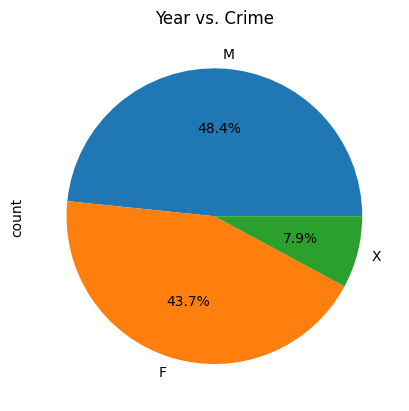

In [50]:
#Visual 2 - FILL IN 
sex = clean_data["Vict Sex"].value_counts();
sex.plot(kind='pie', title='Year vs. Crime',autopct='%1.1f%%');

*Answer to research question:* as we can see the males are the most victems maybe it is because there more violent they are so the they are in harm more but the females also not that low 

### **5.2:** Reflection


If I had more time I would investegate about the moste areas that have crimes or what race the victems are and do a map of crimes and what weapon or crime typically done